# Data Import and Description

In [1]:
# show plots inside the notebook  
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as met
warnings.filterwarnings('ignore')

In [2]:
# Data Loading
dataset1 = pd.read_csv('diabetes.csv')

In [3]:
# Checking Data set Shape
dataset1.shape

(768, 9)

In [4]:
# We see that we have 768 rows and 9 columns

In [5]:
# To see the first 5 rows of the dataset
dataset1.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# To see the last 5 rows of the dataset
dataset1.tail(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
# To find the 5-number summary of the dataset
dataset1.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# To see the distribution of the outcome
dataset1.groupby("class").size()

class
0    500
1    268
dtype: int64

# Data Cleaning

There some datas in the dataset which, physically and medically, cannot be zero. 

In [9]:
# To see the number of zero values under each cooumn
(dataset1==0).sum()

Preg     111
Plas       5
Pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class    500
dtype: int64

We know from medical science that it is impossible to have values of Glucose, BloodPressure, Skinthickness, Insulin and BMI to be zero (0). Especially the values of Skinthickness and Insulin have a lot of zero values 

In [10]:
# Create new dataset with values of original
dataset2 = dataset1.copy()

In [11]:
# To check if dataset2 has same zeros of concerned columns as dataset1
(dataset2.iloc[:,1:6]==0).sum()

Plas      5
Pres     35
skin    227
test    374
mass     11
dtype: int64

In [12]:
# Replacing all 0 values with NaN values (from Numpy library)
dataset2.iloc[:,1:6]=dataset2.iloc[:,1:6].replace(0,np.nan)

In [13]:
# To check number of zeros in  concerned columns
(dataset2.iloc[:,1:6]==0).sum()

Plas    0
Pres    0
skin    0
test    0
mass    0
dtype: int64

In [14]:
# To check number of NaN values in concerned columns
(dataset2.iloc[:,1:6].isnull()).sum()

Plas      5
Pres     35
skin    227
test    374
mass     11
dtype: int64

In [15]:
# Creating a new dataset with original dataset's values so that we can drop zero values and use the mean value to impute into dataset2
dataset3=dataset1.copy()

In [16]:
# Replacing zero values of dataset 3 with NaN
dataset3.iloc[:,1:6]=dataset3.iloc[:,1:6].replace(0,np.nan)

In [17]:
# Dropping NaN values
dataset3.dropna(inplace=True)

In [18]:
# Finding new shape of dataset3 with dropped values
dataset3.shape

(392, 9)

In [19]:
# Replacing all NaN values in dataset2 with the corresponding columns mean values from dataset3 (smaller dataset with dropped NaN Values)
dataset2.iloc[:,1:6] = dataset2.iloc[:,1:6].fillna(dataset3.mean())

In [20]:
dataset1.shape

(768, 9)

In [21]:
dataset2.shape

(768, 9)

In [22]:
dataset3.shape

(392, 9)

In [23]:
dataset1.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
dataset2.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.692888,72.325800,29.151052,155.795560,32.466469,0.471876,33.240885,0.348958
std,3.369578,30.436043,12.101807,8.790943,85.021487,6.875558,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.145408,156.056122,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,156.056122,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
dataset3.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We now have 3 datasets. dataset1 is the original, untouched dataset. dataset2 has imputed missing values from mean of dataset3. dataset3 has missing/NaN values dropped (dataset3 provides a better mean value to impute into dataset2 as it doesnt contain zero values)

We will use dataset2 and continue with visualization 

# Data Visualization and Prediction

We will now visualize the data in various ways

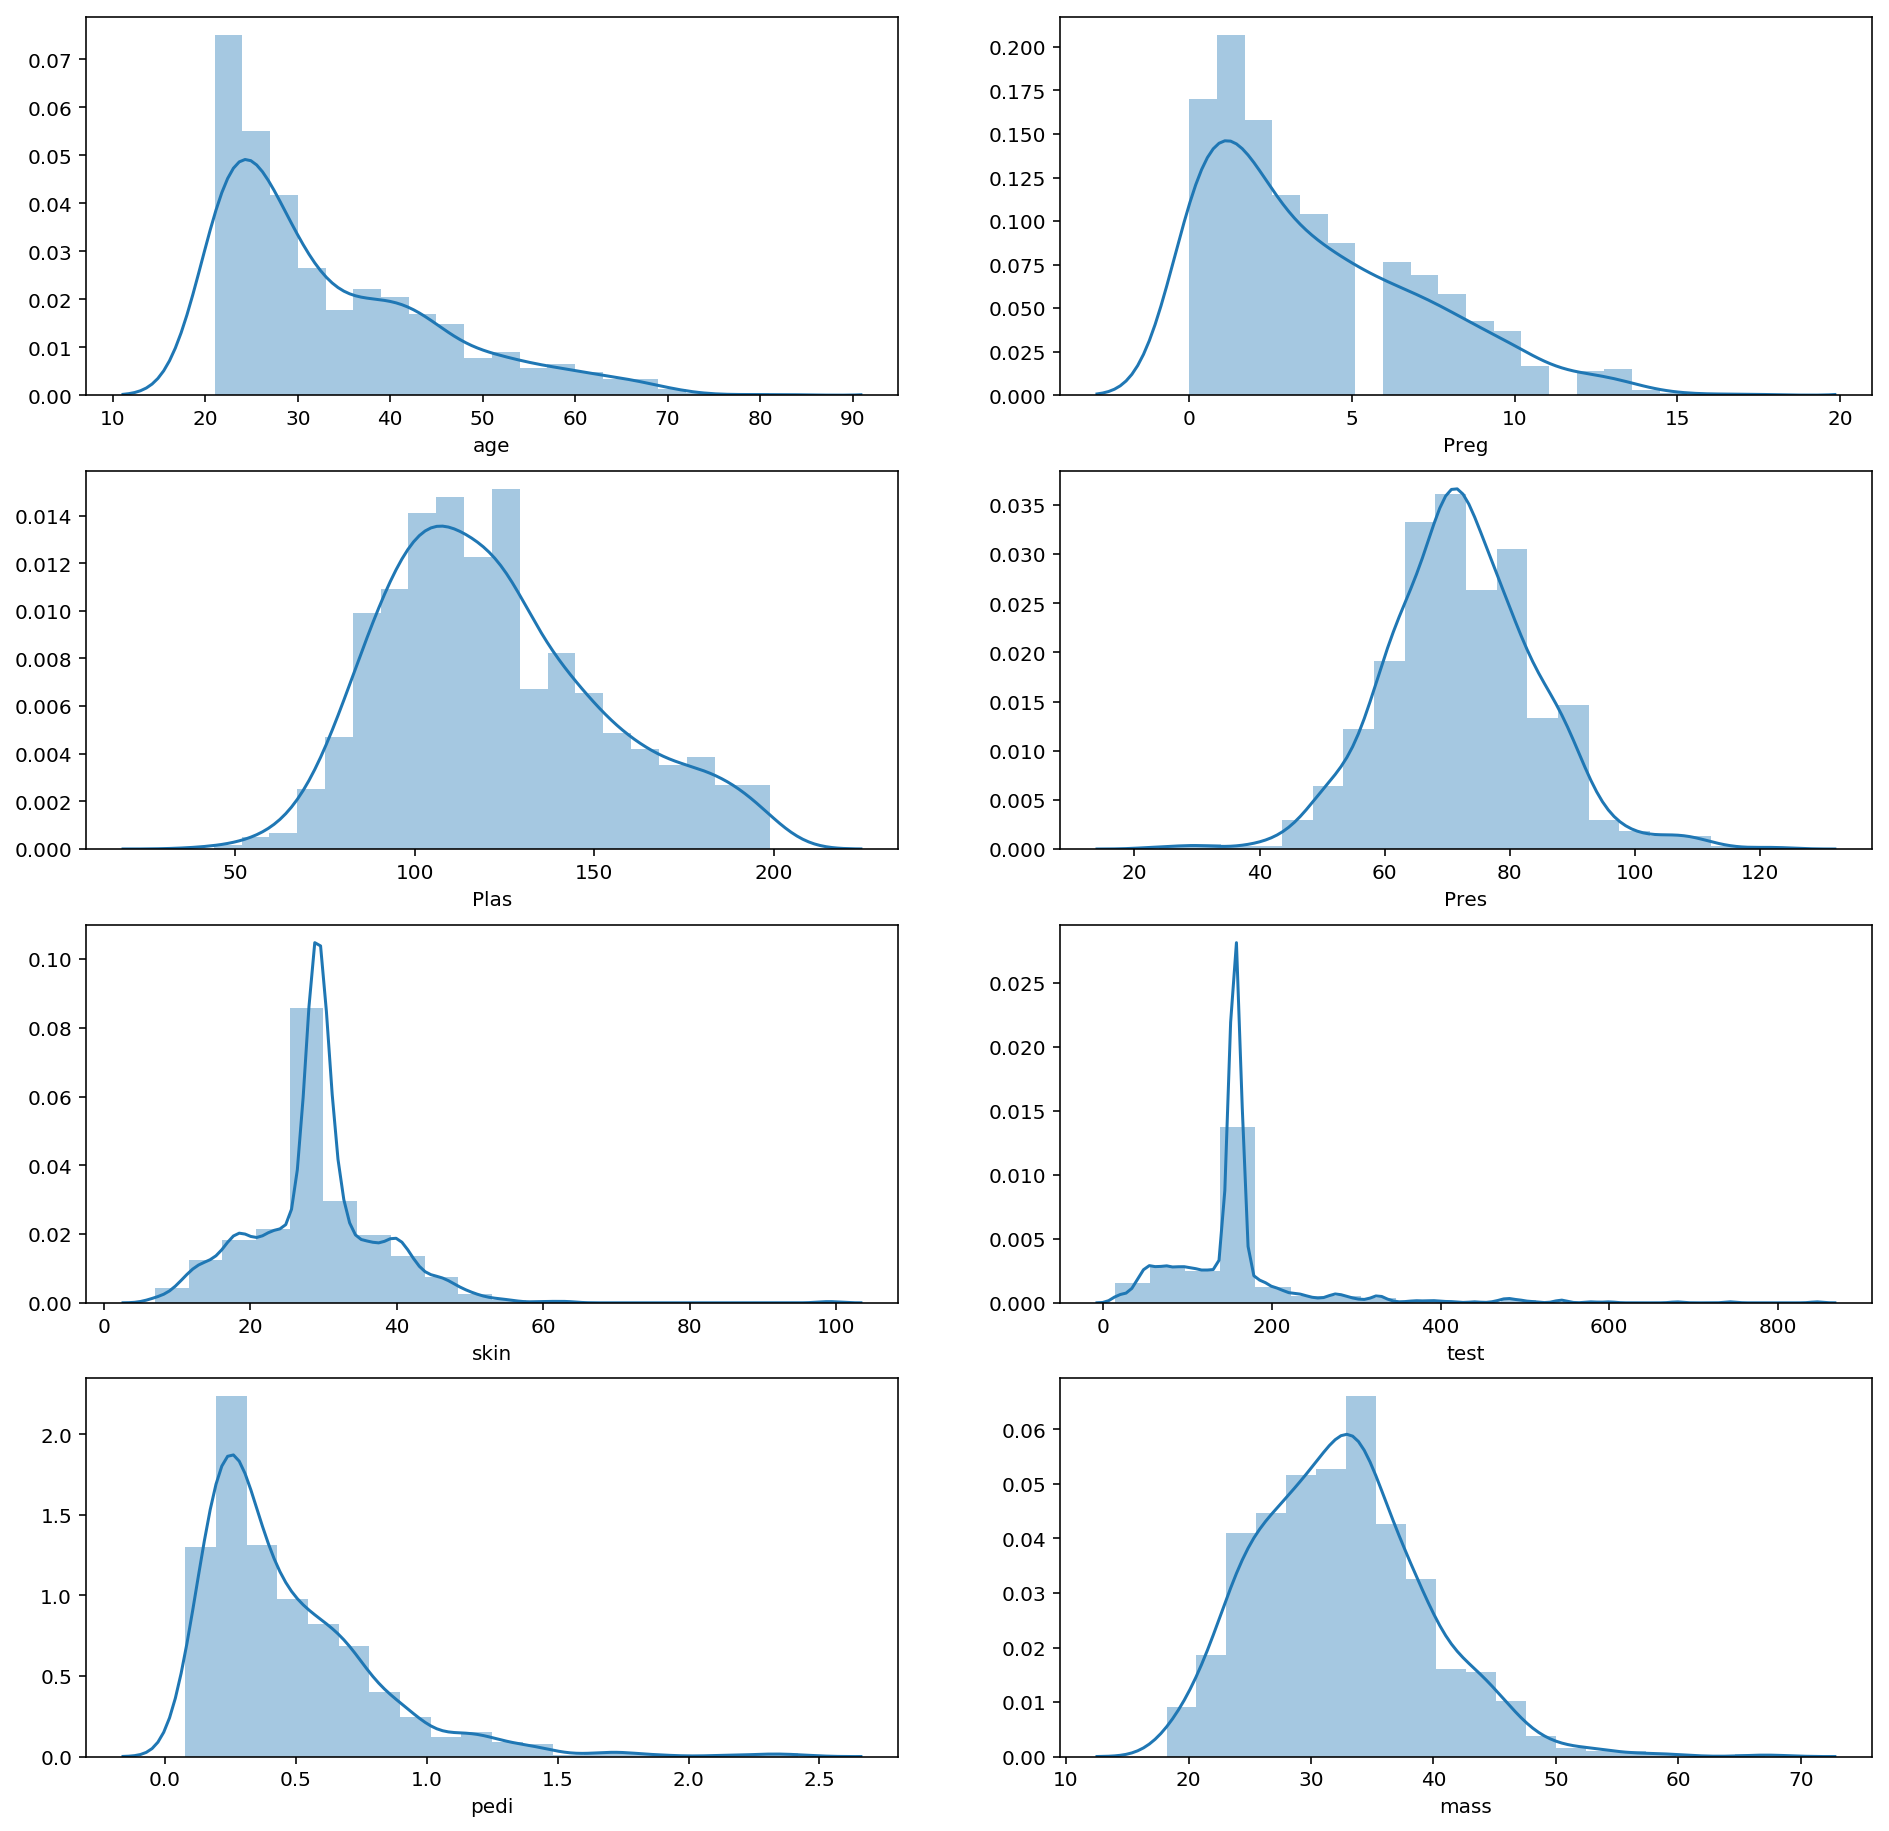

In [26]:
# Plotting a histogram; this tells us about the distribution of data in each independent variable over the values. 
# For example, we can see that there are lot of glucose values of >100,
# or we can see that most BM values are between 20 to 40
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(dataset2.age, bins = 20, ax=ax[0,0]) 
sns.distplot(dataset2.Preg, bins = 20, ax=ax[0,1]) 
sns.distplot(dataset2.Plas, bins = 20, ax=ax[1,0]) 
sns.distplot(dataset2.Pres, bins = 20, ax=ax[1,1]) 
sns.distplot(dataset2.skin, bins = 20, ax=ax[2,0])
sns.distplot(dataset2.test, bins = 20, ax=ax[2,1])
sns.distplot(dataset2.pedi, bins = 20, ax=ax[3,0]) 
sns.distplot(dataset2.mass, bins = 20, ax=ax[3,1]) 

We can see from the above histograms that age, preg, pedi, and plas are having left skewed distribution. Skin, test and mass seem to follow a central similar to normal distribution, albeit with some possible outliers

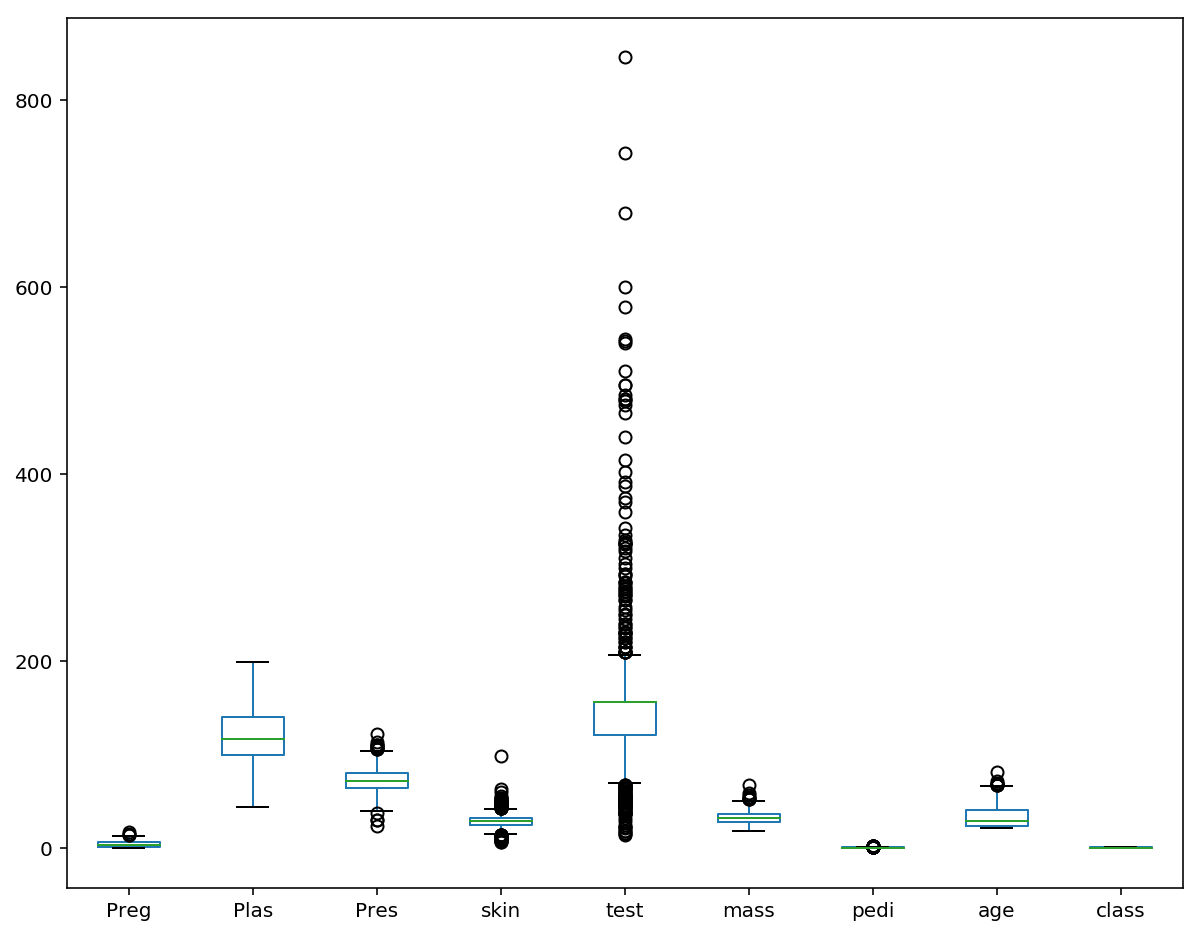

In [27]:
# We are now drawing a boxplot, which is a method for graphically depicting groups of numerical data through their quartiles
dataset2.plot(kind= 'box' ,layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In the above, the boxplot is not normalized and due to varied distribution of our dataset values over various ranges, we cannot visualize properly. hence, we are going to normalize it with the equation: (x-mean)/(max-min), we are putting the result into a new dataset called dataset2_norm with the normalized values

In [28]:
dataset2_norm = (dataset2 - dataset2.mean()) / (dataset2.max() - dataset2.min())

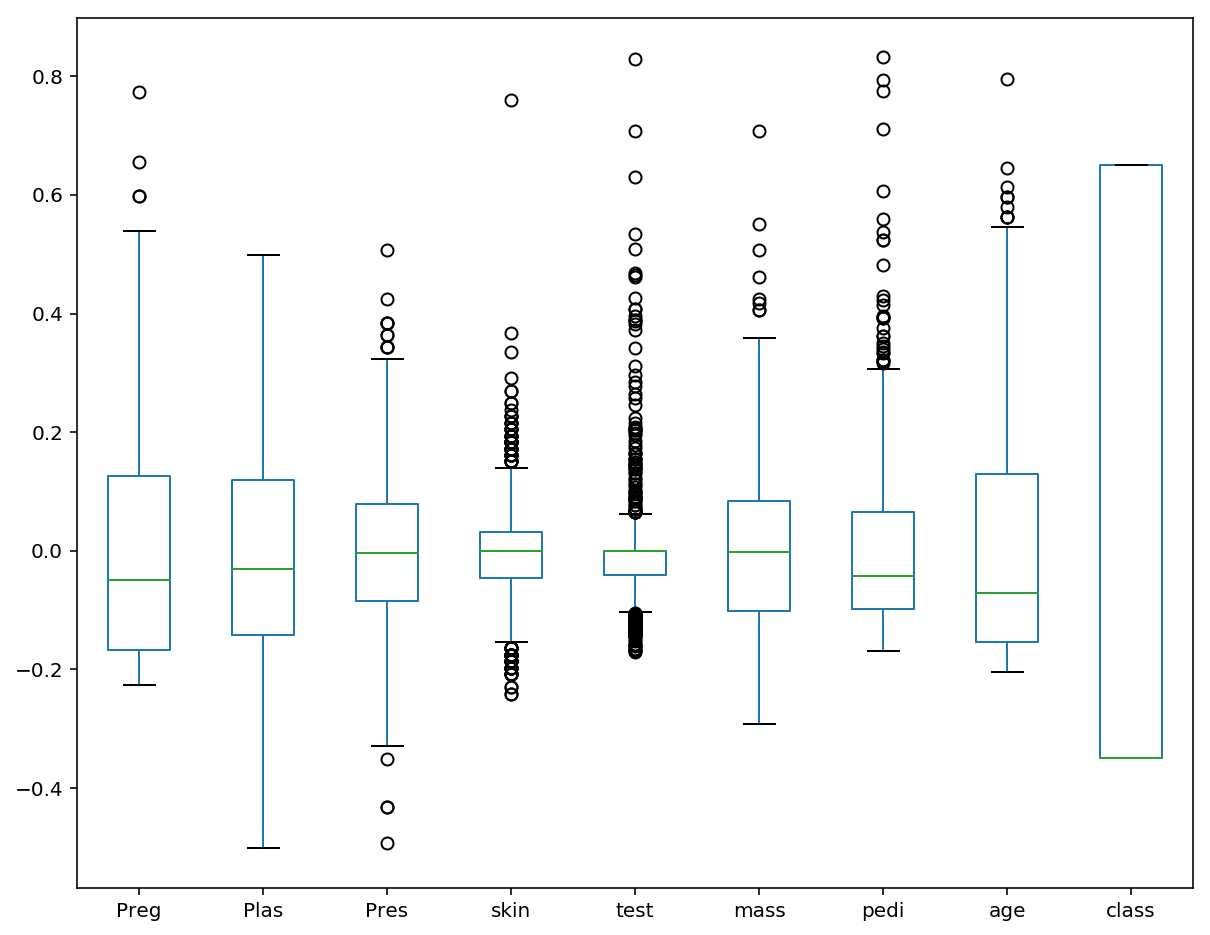

In [29]:
# Here we are plotting the box plot again with normalized values
dataset2_norm.plot(kind= 'box' , layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

We can see each of the attributes' distribution with respect to its minimum, 25 percentile, median, 75 percentile and maximum values. One thing about box plots is that the outliers (with a value certain factor greater than the interquartile range) is not included.

In [30]:
# Describing the normalized dataset
dataset2_norm.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.180326e-18,-4.698209e-18,-6.323654e-16,-6.228064e-16,1.590379e-16,6.004041e-16,2.690990e-16,4.007934e-17,-1.089985e-16
std,1.982105e-01,1.963616e-01,1.234878e-01,9.555372e-02,1.021893e-01,1.406045e-01,1.414725e-01,1.960039e-01,4.769514e-01
min,-2.261795e-01,-5.012444e-01,-4.931204e-01,-2.407723e-01,-1.704274e-01,-2.917478e-01,-1.681795e-01,-2.040148e-01,-3.489583e-01
25%,-1.673560e-01,-1.415670e-01,-8.495714e-02,-4.512013e-02,-4.122062e-02,-1.015638e-01,-9.740662e-02,-1.540148e-01,-3.489583e-01
50%,-4.970895e-02,-3.027669e-02,-3.324488e-03,-6.134205e-05,3.131765e-04,-1.359292e-03,-4.243224e-02,-7.068142e-02,-3.489583e-01
75%,1.267616e-01,1.197233e-01,7.830816e-02,3.096683e-02,3.131765e-04,8.453028e-02,6.591533e-02,1.293186e-01,6.510417e-01
max,7.738205e-01,4.987556e-01,5.068796e-01,7.592277e-01,8.295726e-01,7.082522e-01,8.318205e-01,7.959852e-01,6.510417e-01


Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

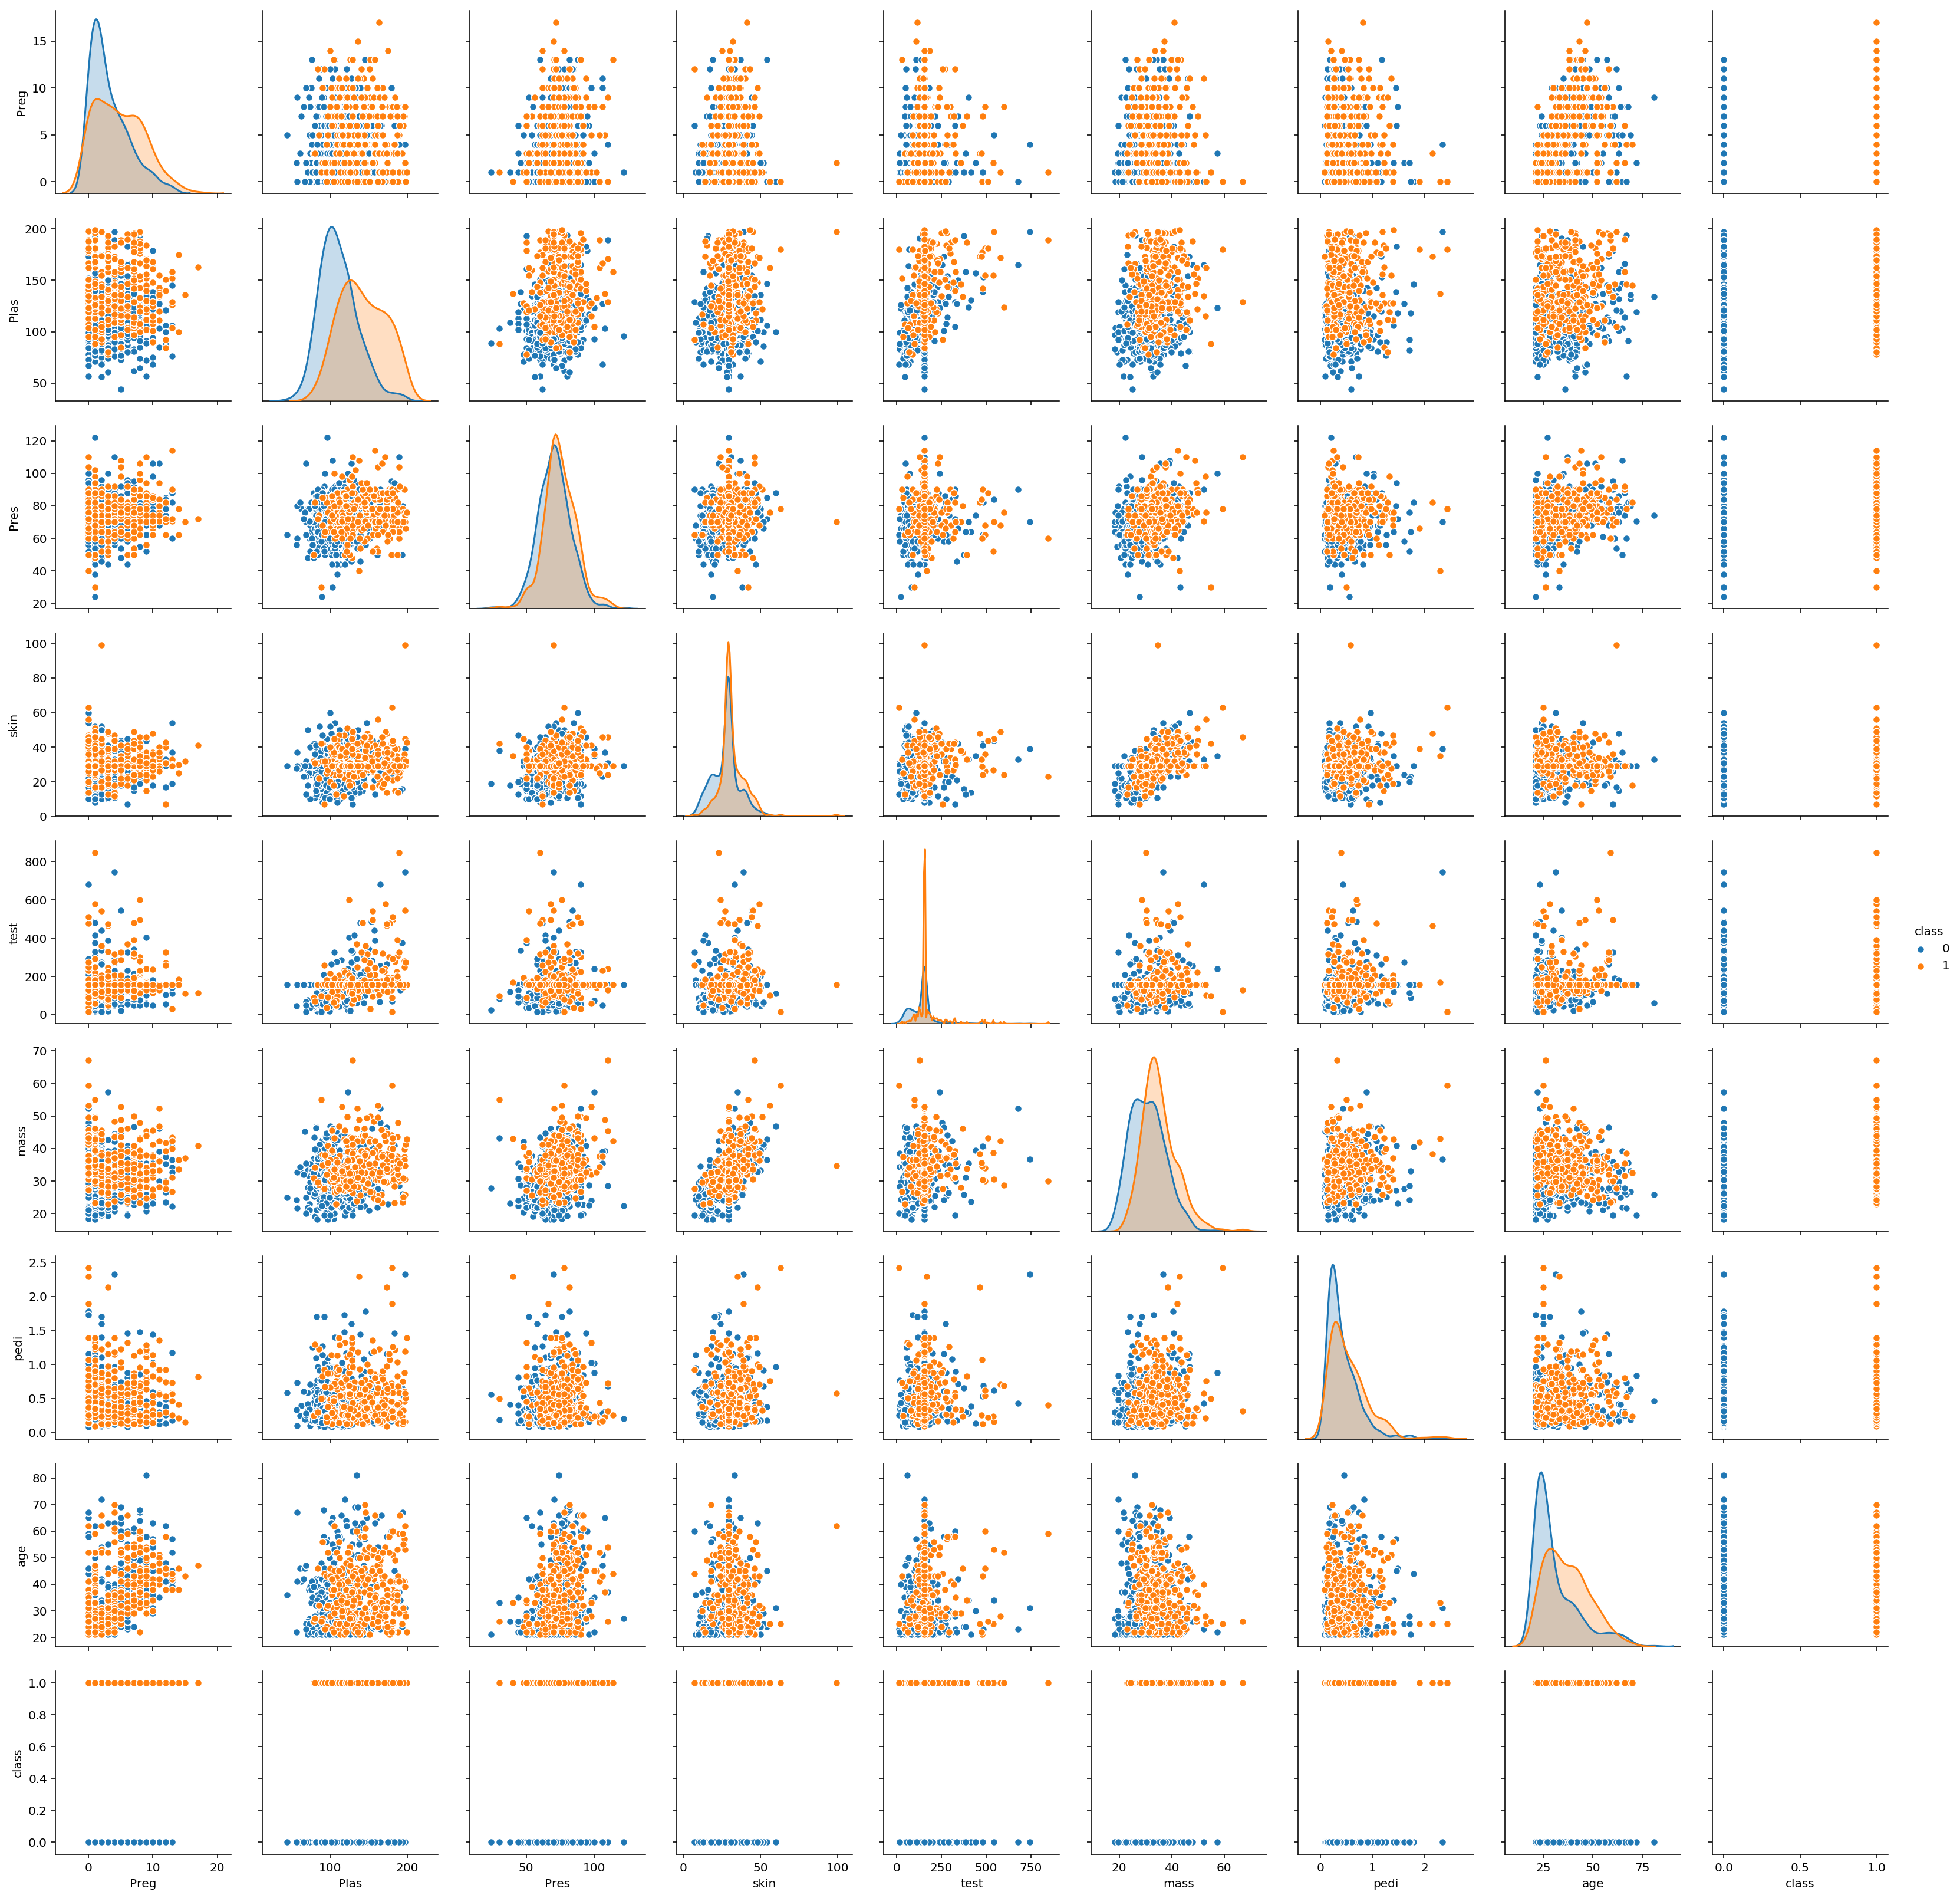

In [31]:
sns.pairplot(data=dataset2,hue='class')

In the above, with blue as class 0 (non-diabetic) and Orange as Class 1(diabetic), we are able to visualize the distributions and correlations of the various classes with epmhasis on the outcome

Variables within a dataset can be related for lots of reasons. It can be useful in data analysis and modeling to better understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neural or zero, meaning that the variables are unrelated.

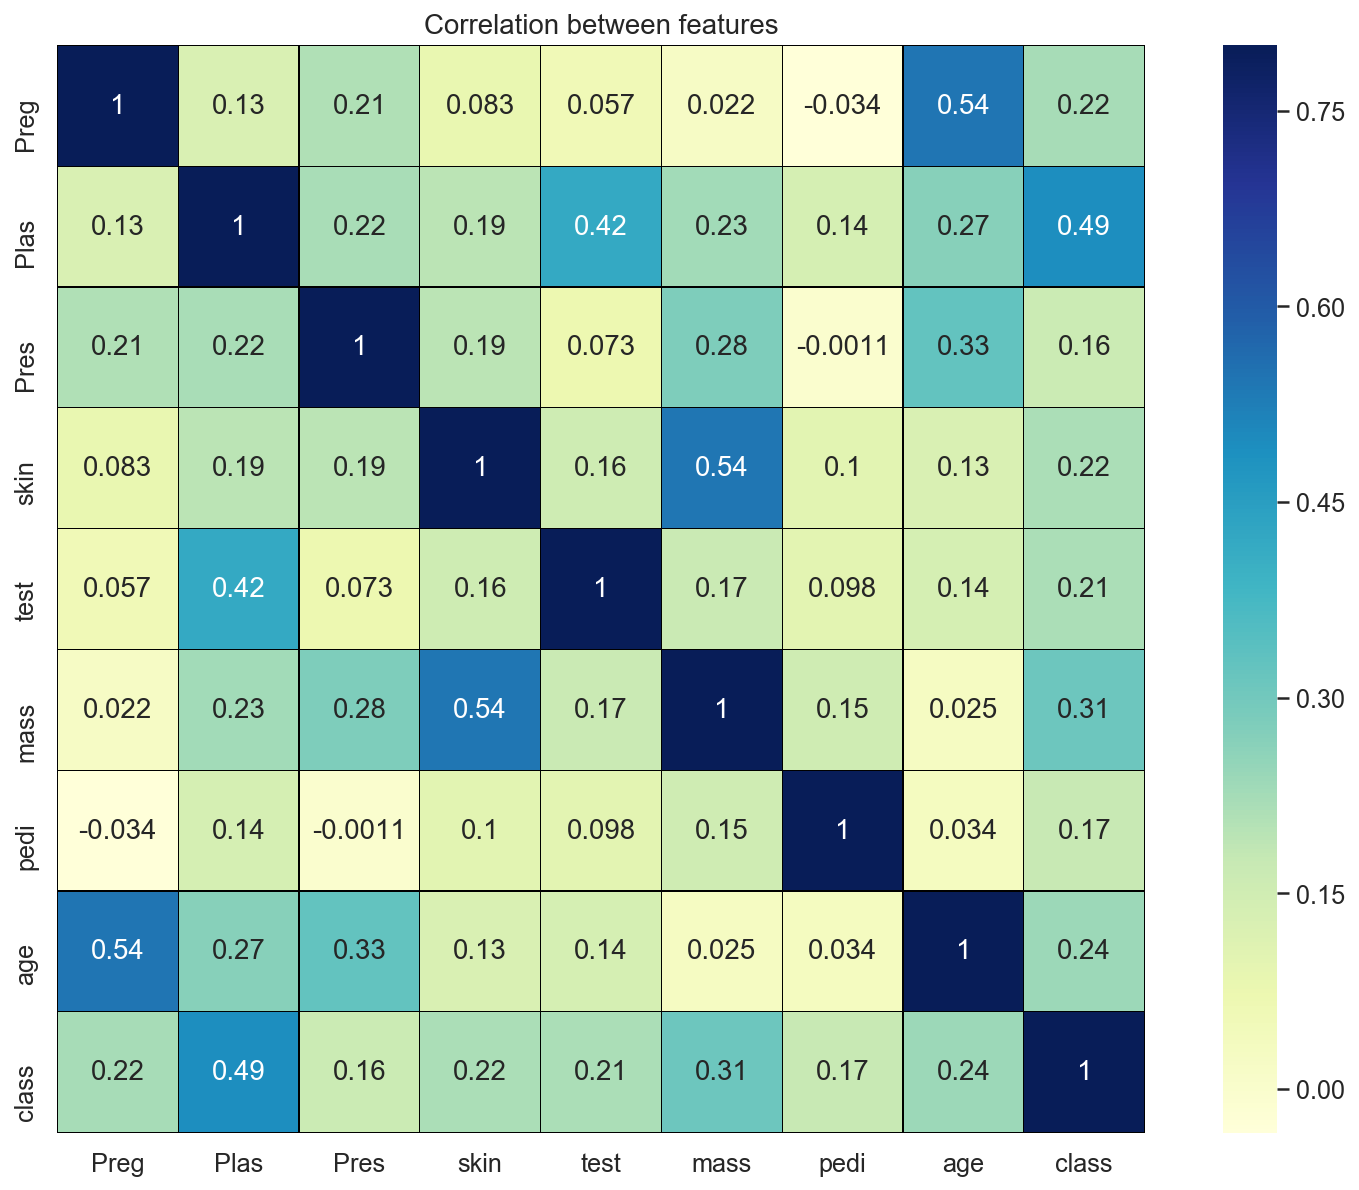

In [32]:
corr=dataset2.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

Seen above, we can notice that the correlation between age and pregnancy, along with plas and test as well as skin and mass seem to be decently correlated to each other. Plas and Mass have the highest correlation to the outcome class. The rest of the class do not seem to have much correlation to each other. This is an important observation for choosing our prediction model.

# Prediction using Naive Bayes

We will be using the Naive Bayes algorithm for predicting whether a person has diabetes or not using the prior and posteriar probabilities of the dataset and the class variable for which the outcome is being tested for. A major assumption of the algorithm is that it assumes that each class variable is independent of each other and the only relationship they have is with the dependent variable. This might be a Naive assumption (hence the name), however based on our observation from the previous section, we see that the correlation between the different classes aren't as great a factor, and hence our assumption can be considered marginally valid. Moving on;

In [33]:
# Creating dataset using Gaussian Naive Bayes Algorithm.
model = GaussianNB()

We will now split the dataset into x (independent classes) and y (dependent outcome)

In [34]:
x = dataset2.iloc[:,0:7].copy()

In [35]:
y = dataset2.iloc[:,8].copy()

Using the train_test_split function from sklearn library, we will be splitting it with a ratio of 77 % train and 33% test data

In [36]:
#Splitting Train and Test sets with 77 - 33 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=1)

Now, applying the GaussianNB model to the train datasets

In [37]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Setting the data set "predicted" with the prediction from the model for the x TRAINING dataset

In [38]:
predicted = model.predict(x_train)

Checking our Model Prediction accuracy against the y TRAINING dataset

In [39]:
print("Model Accuracy: {0:.4f}".format(met.accuracy_score(y_train, predicted)))

Model Accuracy: 0.7529


Setting the data set "predicted2" with the prediction from the model for the x TEST dataset

In [40]:
predicted2 = model.predict(x_test)

Checking our model prediction accuracy against the y TEST dataset

In [41]:
print("Model Accuracy: {0:.4f}".format(met.accuracy_score(y_test, predicted2)))

Model Accuracy: 0.7717


In [42]:
print("Confusion Matrix")

print("{0}".format(met.confusion_matrix(y_test, predicted2, labels=[1, 0])))

Confusion Matrix
[[ 56  36]
 [ 22 140]]


Above, we have drawn the Confusion Matrix. This tells us how many time we got our prediction correct, against the outcomes of 0 (non-diabetic) and 1(diabetic). We see that 56 times we have predicted 1 when it was 1, 36 times predicted 0 when it was 1, 22 times predicted 1 when it was 0 and 140 times predicted 0 when it was 0.

In [43]:
print("Classification Report")
print(met.classification_report(y_test, predicted2, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.72      0.61      0.66        92
           0       0.80      0.86      0.83       162

   micro avg       0.77      0.77      0.77       254
   macro avg       0.76      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254



As per our Classification report, we have a high precision when prediction 0, and lower precision when predicting 1. The recall value also seems to be lower for predicting 1 than for 0. Overall, our model is good at being correct when predicting 0 when outcome is actually 0, as opposed to predicting for 1. 